In [1]:
#Importing Needed Libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

In [48]:
size=100000
min_exit_velo=33   #about 75 mph in m/s, lowest ever homerun 85.4 mph
max_exit_velo=56    #about 125 mph in m/s, highest 122.4 mph

exit_vel=np.random.uniform(min_exit_velo, max_exit_velo, size)  #Makes 1 million random data points in the range
  


min_launch_angle= (10*np.pi)/180     #10 degrees, lowest ever was 13.5 degrees
max_launch_angle= (55*np.pi)/180     #55 degrees, highest ever was 49.7 degrees
launch_angl=np.random.uniform(min_launch_angle, max_launch_angle, size)  #Makes random data points in the range

np.savetxt("./exit_velo.csv", exit_vel, delimiter=",", header="Exit Velocity")
np.savetxt("./launch_angle.csv", launch_angl, delimiter=",", header="Launch Angle")

In [49]:
exit_velo = np.loadtxt("./exit_velo.csv", delimiter=',')
launch_angle = np.loadtxt("./launch_angle.csv", delimiter=',')

<function matplotlib.pyplot.show(close=None, block=None)>

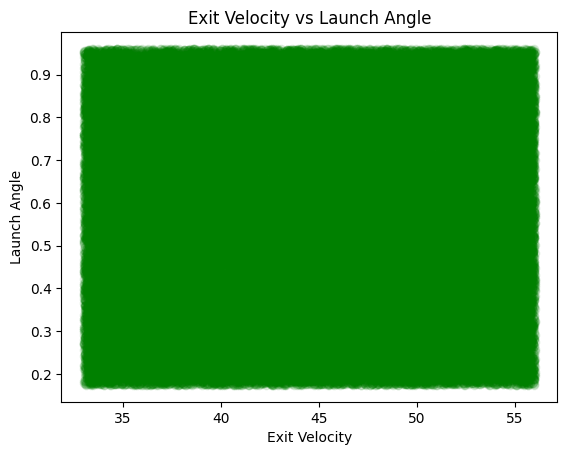

In [50]:
#Plot to check distribution
plt.scatter(exit_velo, launch_angle, color='green', alpha=0.1)
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')
plt.title('Exit Velocity vs Launch Angle')
plt.show

Looks like I'm covering pretty much everything

# Setting up Functions

In [51]:
#Create a time array and list my variables
T=np.linspace(0,8,100)
M=0.145  #Mass of a baseball
a=np.pi*(0.036576**2)  #Cross-sectional area of the ball
c=0.3   #Drag coefficient 
Rho=1.10  #Air density example
G=9.81   #acceleration due to gravity

#Function for x-velocity
def x_velo(t,m,A,C,rho,angle,velo):
    vx=np.exp(-0.00434776*t*rho*velo*np.cos(angle))*velo*np.cos(angle)
    return(vx)

x_velo_time=x_velo(T,M,a,c,Rho,launch_angle[0],exit_velo[0])

<function matplotlib.pyplot.show(close=None, block=None)>

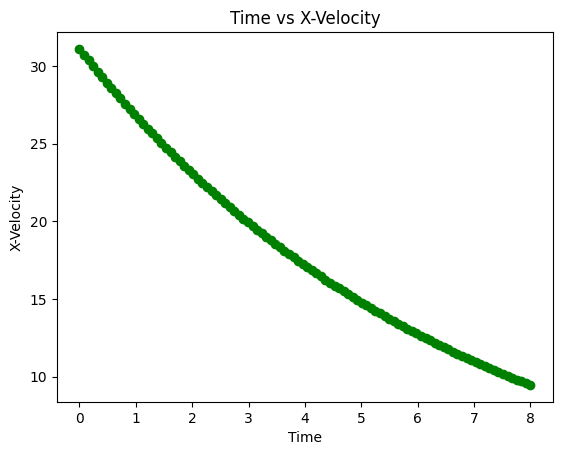

In [52]:
#Plot to check if function works
plt.scatter(T, x_velo_time, color='green', alpha=1)
plt.xlabel('Time')
plt.ylabel('X-Velocity')
plt.title('Time vs X-Velocity')
plt.show

In [53]:
#Expression for x-position
def expression(t, v, angle, rho):
    vx0=v*np.cos(angle)
    exp_term1 = np.exp(-0.00434776 * t * rho * vx0)
    exp_term2 = np.exp(0.00434776 * t * rho * vx0)
    cos_theta = np.cos(angle)

    # Polynomial terms
    poly_inner = (
        -317410. - 230.004 * rho * vx0
    )
    poly_inner = -1.82513e8 + rho * vx0 * poly_inner
    poly_inner = -5.59716e10 + rho * vx0 * poly_inner
    poly_inner = -9.65525e12 + rho * vx0 * poly_inner
    poly_inner = -8.88297e14 + rho * vx0 * poly_inner
    poly1 = -3.40519e16 + rho * vx0 * poly_inner

    poly_inner2 = (
        317410. + 230.004 * rho * vx0
    )
    poly_inner2 = 1.82513e8 + rho * vx0 * poly_inner2
    poly_inner2 = 5.59716e10 + rho * vx0 * poly_inner2
    poly_inner2 = 9.65525e12 + rho * vx0 * poly_inner2
    poly_inner2 = 8.88297e14 + rho * vx0 * poly_inner2
    poly2 = 3.40519e16 + rho * vx0 * poly_inner2

    numerator = exp_term1 * v * cos_theta * (poly1 + exp_term2 * poly2)

    denominator = rho * vx0 * (
        1.21676e7 + rho * vx0 * (158705. + rho * vx0 * (690.011 + rho * vx0))
    ) ** 2

    return numerator / denominator

In [54]:
x_distance=expression(T,exit_velo[1],launch_angle[1],Rho)

<function matplotlib.pyplot.show(close=None, block=None)>

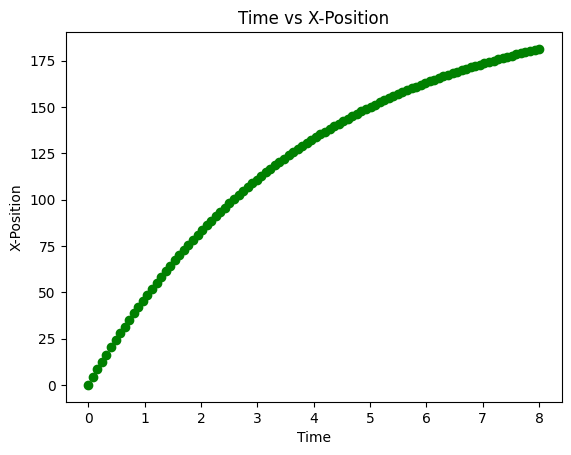

In [55]:
#Plot x-position
plt.scatter(T, x_distance, color='green', alpha=1)
plt.xlabel('Time')
plt.ylabel('X-Position')
plt.title('Time vs X-Position')
plt.show

In [57]:
#Y-position function
def ypos(t, v, theta, A, C, rho, m, g):
    vy0 = v*np.sin(theta)
    exp_term = np.exp(-(a * c * t * rho * vy0) / (2 * m))
    
    term1 = (2 * (1 - exp_term) * m * v * np.sin(theta)) / (a * c * rho * vy0)
    
    term2_numerator = 2 * g * m * ((2 - 2 * exp_term) * m - a * c * t * rho * vy0)
    term2_denominator = (a ** 2) * (c ** 2) * (rho ** 2) * (vy0 ** 2)
    
    term2 = term2_numerator / term2_denominator
    
    return 1 + term1 + term2

In [58]:
yposition=ypos(T, exit_velo[1], launch_angle[1], a, c, Rho, M, G)

<function matplotlib.pyplot.show(close=None, block=None)>

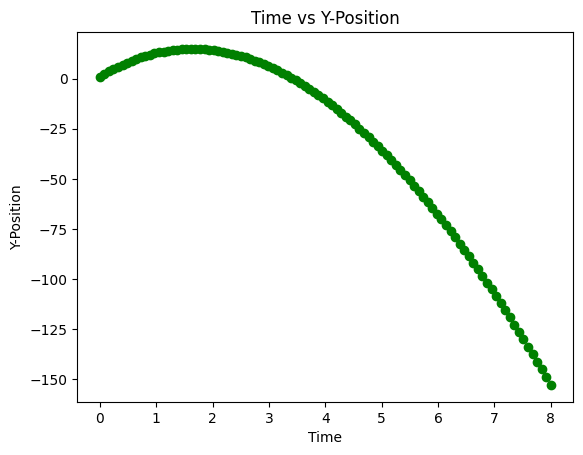

In [59]:
#Plot to check if it makes sense
plt.scatter(T, yposition, color='green', alpha=1)
plt.xlabel('Time')
plt.ylabel('Y-Position')
plt.title('Time vs Y-Position')
plt.show

# Proof of Concept

In [60]:
all_x_positions = []  # list of lists
all_y_positions = []

for v, thta in zip(exit_velo, launch_angle):
    x_vals = []
    y_vals = []

    # Define time range
    t = 0
    dt = .5  # time step (seconds)
    
    while True:
        x = expression(t, v, thta, Rho)
        y = ypos(t, v, thta, a, c, Rho, M, G)
        
        if y < 0:
            break  # stop when projectile hits the ground

        x_vals.append(x)
        y_vals.append(y)
        
        t += dt

    all_x_positions.append(x_vals)
    all_y_positions.append(y_vals)


In [61]:
all_x_positions

[[0.0,
  14.991101501911956,
  28.907403352814043,
  41.82596421911987,
  53.81831798123892,
  64.95086983776287,
  75.28526401062916,
  84.87872508735319,
  93.7843748904409,
  102.05152662858289,
  109.72595795843012,
  116.85016446897588,
  123.46359499216135],
 [0.0,
  24.81619199126406,
  46.68707816283072,
  65.96222166986077,
  82.94969781975794,
  97.92101805081482,
  111.11546950923302],
 [0.0,
  12.80740197002121,
  24.830322643614892,
  36.11681321070129,
  46.71198162104507,
  56.65817286413284,
  65.99513820651438,
  74.76019406298809,
  82.9883711365798,
  90.71255442337267],
 [0.0,
  24.072559102077456,
  45.37368345405527,
  64.22244385108598,
  80.90117698432958,
  95.65971457886454,
  108.7191256377991,
  120.27502784787829,
  130.50051774832468],
 [0.0,
  13.478340756503888,
  26.08785443117432,
  37.88454647095493,
  48.92081215667823,
  59.24566931791831,
  68.90497604681613,
  77.94163437785734,
  86.39578083825181,
  94.3049647152487],
 [0.0,
  17.075746324217757

In [62]:
count=0
for i in range(0,len(all_x_positions)):
    for x in range(0,len(all_x_positions[i])):
        if all_y_positions[i][x-1] > 2.5 and all_y_positions[i][x] <= 2.5 and all_x_positions[i][x]>122:
            count += 1
            break

In [63]:
count

6368

# Now loop with multiple different air densities/Elevations

In [4]:
#Use this function to find air density at certain elevation
H=8,400
RhoSeaLevel=1.225
height=np.linspace(0,1600,10)


def rhofunc(heigt):
    rhoasfuncofheight=RhoSeaLevel*np.exp(-heigt/8400)
    
    return rhoasfuncofheight

heightrho=rhofunc(height)  #Make list of the different air densities at different elevations


# If you want to run this following cell I recommend changing dt to a much larger value or else it will take about 18 minutes

In [65]:
start = time.time() #was curious how long this takes

# List of Rho values to loop through (TAKES ABOUT 18 MINUTES TO RUN THROUGH)
rho_values = heightrho  # example values — adjust as needed

# Dictionary to store counts for each Rho
rho_counts = {}
completehighestaveragex=[]
for Rho in rho_values:
    all_x_positions = []
    all_y_positions = []
    highestx = []

    for v, thta in zip(exit_velo, launch_angle):
        x_vals = []
        y_vals = []

        t = 0
        dt = 0.05  # time step

        while True:
            x = expression(t, v, thta, Rho)
            y = ypos(t, v, thta, a, c, Rho, M, G)

            if y < 0:
                break

            x_vals.append(x)
            y_vals.append(y)

            t += dt

        all_x_positions.append(x_vals)
        all_y_positions.append(y_vals)

# Count how many trajectories go over 2.5 then drop below it after x > 122
    count = 0
    for i in range(len(all_x_positions)):
        highest=np.max(all_x_positions[i])
        highestx.append(highest)
        for x in range(1, len(all_x_positions[i])):  # start at 1 to use x-1
            if (all_y_positions[i][x - 1] > 2.5 and all_y_positions[i][x] <= 2.5 and all_x_positions[i][x] > 122):
                count += 1
                break
    average=np.mean(highestx)  
    completehighestaveragex.append(average)
    rho_counts[Rho] = count  # store the count for this Rho

# Now rho_counts has the number of hits for each Rho value
print(rho_counts)


end = time.time()
print(f"Runtime: {end - start:.2f} seconds")

{1.225: 21535, 1.1993464972551866: 23139, 1.1742302207986004: 24602, 1.149639920233458: 26075, 1.1255645807646772: 27504, 1.1019934182649946: 28827, 1.078915874444401: 30141, 1.0563216121207422: 31370, 1.0342005105893581: 32600, 1.0125426610896917: 33776}
Runtime: 1089.58 seconds


In [66]:
#Extract the counts from the dictionary
counts = list(rho_counts.values())


#Save data
np.savetxt("./rho_counts.csv",np.column_stack((heightrho,counts)),delimiter=",",header="Rho Value, Home Run Count")
np.savetxt("./rho_averagedistance.csv",np.column_stack((heightrho,completehighestaveragex)),delimiter=",",header="Rho Value, Average X-Distance")

# Fitting the Data

<function matplotlib.pyplot.show(close=None, block=None)>

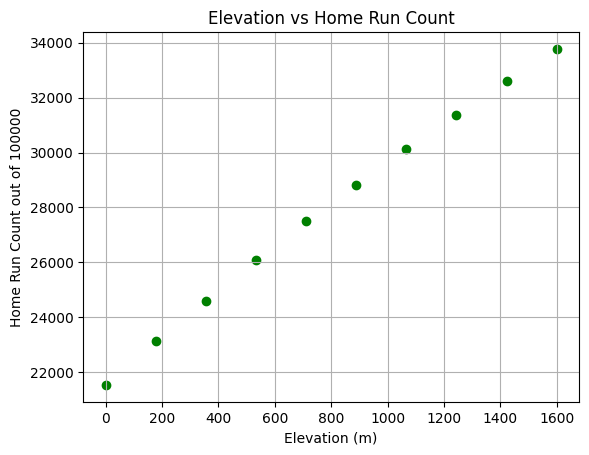

In [14]:
data = np.loadtxt("./rho_counts.csv", delimiter=',')

#Plot to Elevation vs Homerun Count
plt.scatter(height, data[:,1], color='green', alpha=1)
plt.xlabel('Elevation (m)')
plt.ylabel('Home Run Count out of 100000')
plt.title('Elevation vs Home Run Count')
plt.grid(True)
plt.show

[7.71879545e+00 2.18645636e+04]


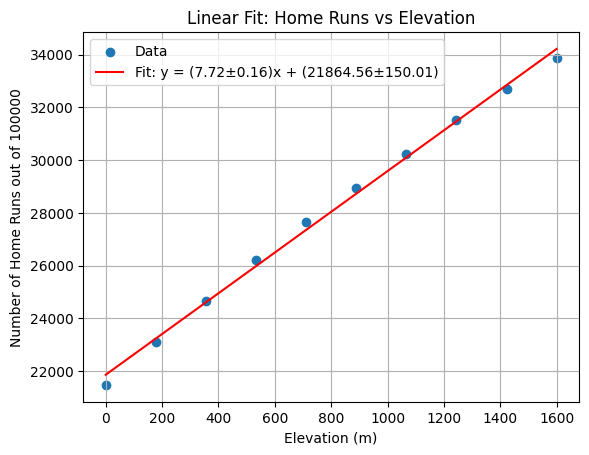

In [24]:
# Fit a line: y = m*x + b
linear_fit, linear_cov=np.polyfit(height,data[:,1],1,cov=True) #Determine the fit values m,b, 1=polynomial order
print(linear_fit)
# Generate line for plotting
x_fit = np.linspace(min(height), max(height), 10)
y_fit = linear_fit[0] * x_fit + linear_fit[1]



linear_sigmam=np.sqrt(linear_cov[0,0])   #Error in slope
linear_sigmab=np.sqrt(linear_cov[1,1])   #Error in y intercept



# Plot
plt.scatter(height, data[:,1], label='Data')
plt.plot(x_fit, y_fit, color='red', label=f'Fit: y = ({linear_fit[0]:.2f}±{linear_sigmam:.2f})x + ({linear_fit[1]:.2f}±{linear_sigmab:.2f})')
plt.xlabel('Elevation (m)')
plt.ylabel('Number of Home Runs out of 100000')
plt.title('Linear Fit: Home Runs vs Elevation')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
def chisquared(fit,true):
    chis=sum((fit-true)**2)
    return(chis)

Chi_Squaredlinear=chisquared(y_fit,data[:,1])

In [26]:
Chi_Squaredlinear

521140.02424242505

[-9.87690874e-04  9.29910085e+00  2.14899727e+04] [[ 1.79840571e-09 -2.87744913e-06  6.82062017e-04]
 [-2.87744913e-06  4.96768502e-03 -1.38231235e+00]
 [ 6.82062017e-04 -1.38231235e+00  5.86337560e+02]]


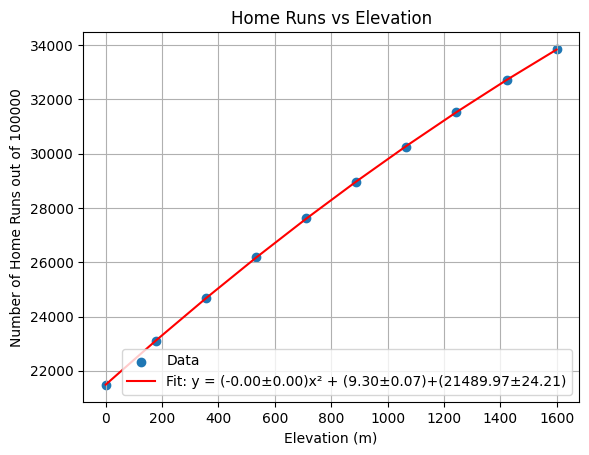

In [27]:
# Fit 2nd order
fit, cov=np.polyfit(height,data[:,1],2,cov=True) #Determine the fit values m,b, 2=polynomial order
print(fit,cov)
# Generate line for plotting
x2_fit = np.linspace(min(height), max(height), 10)
y2_fit = fit[0]*(x2_fit*x2_fit) + fit[1]*x2_fit+fit[2]



sigmam1=np.sqrt(cov[0,0])   #Error in slope 1
sigmam2=np.sqrt(cov[1,1])   #Error in slope 2
sigmab=np.sqrt(cov[2,2])    #Error in y-intercept


# Plot
plt.scatter(height, data[:,1], label='Data')
plt.plot(x2_fit, y2_fit, color='red', label=f'Fit: y = ({fit[0]:.2f}±{sigmam1:.2f})x² + ({fit[1]:.2f}±{sigmam2:.2f})+({fit[2]:.2f}±{sigmab:.2f})')
plt.xlabel('Elevation (m)')
plt.ylabel('Number of Home Runs out of 100000')
plt.title('Home Runs vs Elevation')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
Chi_Squaredpoly=chisquared(y2_fit,data[:,1])

In [29]:
Chi_Squaredpoly

6639.410606060556

[ 1.64184143e-07 -1.38173282e-03  9.53831512e+00  2.14667259e+04] [[ 6.85537412e-15 -1.64528979e-11  9.98819545e-09 -9.70653267e-07]
 [-1.64528979e-11  4.07544374e-08 -2.59996411e-05  2.81027232e-03]
 [ 9.98819545e-09 -2.59996411e-05  1.80538084e-02 -2.38845756e+00]
 [-9.70653267e-07  2.81027232e-03 -2.38845756e+00  5.50674595e+02]]


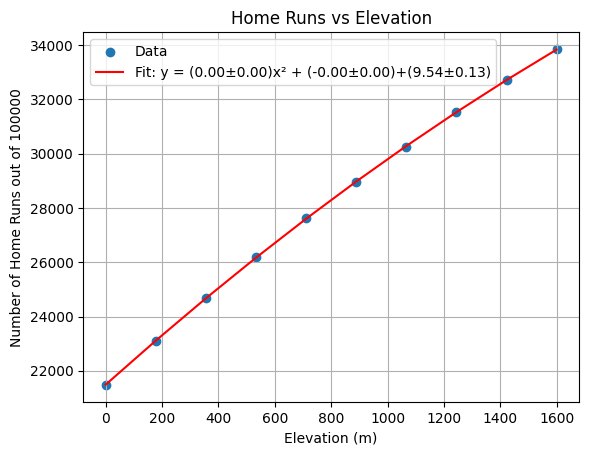

In [30]:
# Fit 3rd order
fit, cov=np.polyfit(height,data[:,1],3,cov=True) #Determine the fit values m,b, 2=polynomial order
print(fit,cov)
# Generate line for plotting
x2_fit = np.linspace(min(height), max(height), 10)
y3_fit = fit[0]*(x2_fit*x2_fit*x2_fit) + fit[1]*x2_fit*x2_fit+fit[2]*x2_fit+fit[3]



sigmam1=np.sqrt(cov[0,0])   #Error in slope 1
sigmam2=np.sqrt(cov[1,1])   #Error in slope 2
sigmab=np.sqrt(cov[2,2])    #Error in y-intercept


# Plot
plt.scatter(height, data[:,1], label='Data')
plt.plot(x2_fit, y2_fit, color='red', label=f'Fit: y = ({fit[0]:.2f}±{sigmam1:.2f})x² + ({fit[1]:.2f}±{sigmam2:.2f})+({fit[2]:.2f}±{sigmab:.2f})')
plt.xlabel('Elevation (m)')
plt.ylabel('Number of Home Runs out of 100000')
plt.title('Home Runs vs Elevation')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
Chi_Squared3poly=chisquared(y3_fit,data[:,1])

In [32]:
Chi_Squared3poly

4010.8557109559174

[ 9.81584962e-11 -1.49923044e-07 -1.06840120e-03  9.43904174e+00
  2.14709615e+04] [[ 4.68773543e-20 -1.50007534e-16  1.49637145e-13 -4.74097884e-11
   2.02281764e-09]
 [-1.50007534e-16  4.87925739e-13 -4.97802779e-10  1.63223902e-07
  -7.59180941e-06]
 [ 1.49637145e-13 -4.97802779e-10  5.24630866e-07 -1.81304396e-04
   9.69620571e-03]
 [-4.74097884e-11  1.63223902e-07 -1.81304396e-04  6.87574245e-02
  -4.79877336e+00]
 [ 2.02281764e-09 -7.59180941e-06  9.69620571e-03 -4.79877336e+00
   7.22004918e+02]]


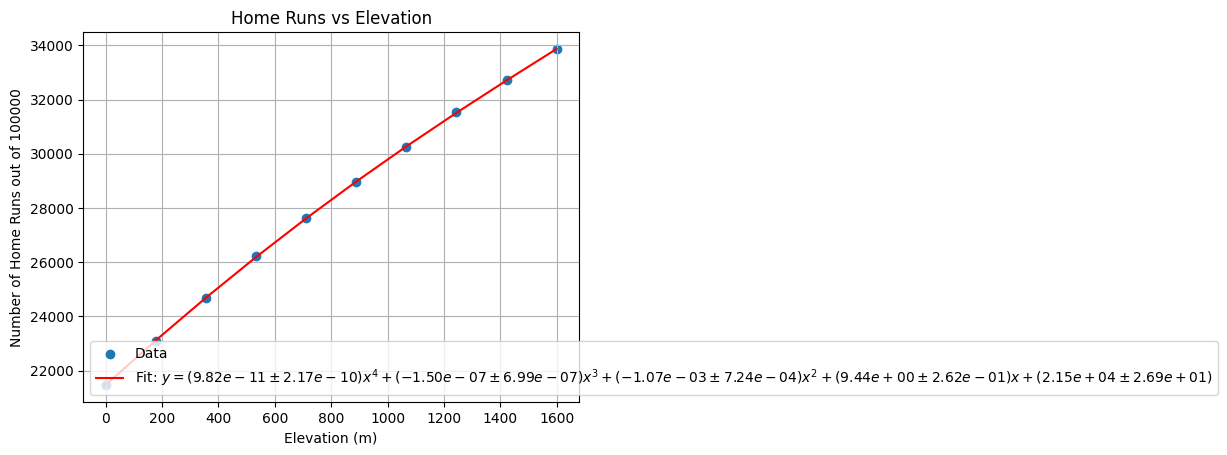

In [33]:
# Fit 4th order
fit, cov=np.polyfit(height,data[:,1],4,cov=True) #Determine the fit values m,b, 2=polynomial order
print(fit,cov)
# Generate line for plotting
x2_fit = np.linspace(min(height), max(height), 10)
y4_fit = fit[0]*(x2_fit*x2_fit*x2_fit*x2_fit)+fit[1]*(x2_fit*x2_fit*x2_fit) + fit[2]*x2_fit*x2_fit+fit[3]*x2_fit+fit[4]



sigmam1=np.sqrt(cov[0,0])   #Error in slope 1
sigmam2=np.sqrt(cov[1,1])   #Error in slope 2
sigmam3=np.sqrt(cov[2,2])   #Error in slope 3
sigmam4=np.sqrt(cov[3,3])   #Error in slope 4
sigmab=np.sqrt(cov[4,4])    #Error in y-intercept


# Plot
plt.scatter(height, data[:,1], label='Data')
plt.plot(x2_fit, y4_fit, color='red', label=r'Fit: $y = (%.2e \pm %.2e)x^4 + (%.2e \pm %.2e)x^3 + '
        r'(%.2e \pm %.2e)x^2 + (%.2e \pm %.2e)x + (%.2e \pm %.2e)$'
        % (fit[0], sigmam1, fit[1], sigmam2, fit[2], sigmam3, fit[3], sigmam4, fit[4], sigmab))
plt.xlabel('Elevation (m)')
plt.ylabel('Number of Home Runs out of 100000')
plt.title('Home Runs vs Elevation')
plt.legend()
plt.grid(True)
plt.savefig('Elevation_vs_Homerun_count.png')
plt.show()

In [34]:
Chi_Squared4poly=chisquared(y4_fit,data[:,1])
Chi_Squared4poly

3852.4889277390994

# Plotting with Average distance vs rho

In [2]:
average = np.loadtxt("./rho_averagedistance.csv", delimiter=',')

<function matplotlib.pyplot.show(close=None, block=None)>

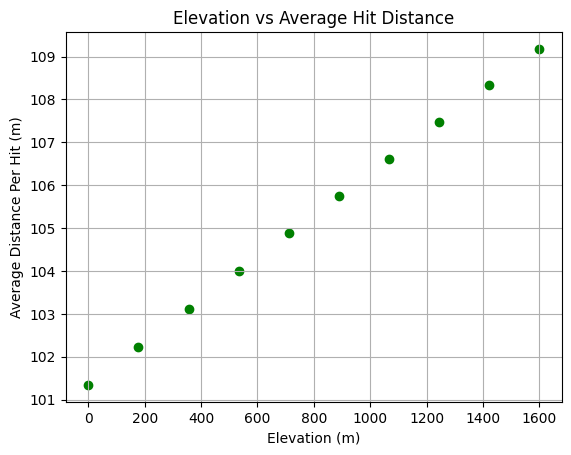

In [5]:
#Plot of Average Distance vs Rho
plt.scatter(height, average[:,1], color='green', alpha=1)
plt.xlabel('Elevation (m)')
plt.ylabel('Average Distance Per Hit (m)')
plt.title('Elevation vs Average Hit Distance')
plt.grid(True)
plt.show

[4.89990104e-03 1.01371179e+02]


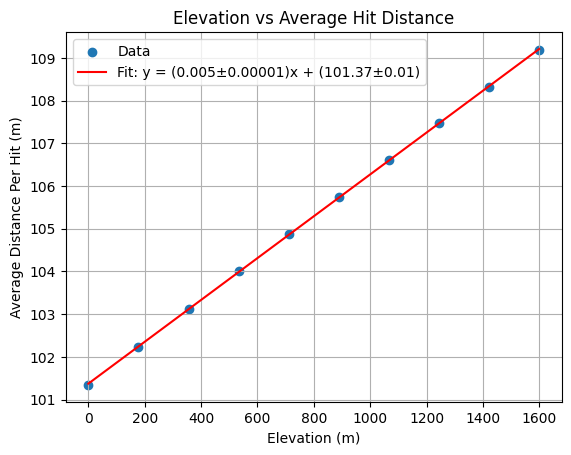

In [17]:
# Fit a line: y = m*x + b
linear_fit, linear_cov=np.polyfit(height,average[:,1],1,cov=True) #Determine the fit values m,b, 1=polynomial order
print(linear_fit)
# Generate line for plotting
x_fit = np.linspace(min(height), max(height), 10)
y_fit = linear_fit[0] * x_fit + linear_fit[1]



linear_sigmam=np.sqrt(linear_cov[0,0])   #Error in slope
linear_sigmab=np.sqrt(linear_cov[1,1])   #Error in y intercept



# Plot
plt.scatter(height, average[:,1], label='Data')
plt.plot(x_fit, y_fit, color='red', label=f'Fit: y = ({linear_fit[0]:.3f}±{linear_sigmam:.5f})x + ({linear_fit[1]:.2f}±{linear_sigmab:.2f})')
plt.xlabel('Elevation (m)')
plt.ylabel('Average Distance Per Hit (m)')
plt.title('Elevation vs Average Hit Distance')
plt.legend()
plt.grid(True)
plt.savefig('Elevation_vs_Average_Hit_Distance.png')
plt.show()

In [18]:
Chi_Squaredaveragelinear=chisquared(y_fit,average[:,1])
Chi_Squaredaveragelinear

0.003473023140750997

In [69]:
average

array([[  1.225     , 101.34143678],
       [  1.1993465 , 102.23152897],
       [  1.17423022, 103.11793606],
       [  1.14963992, 103.99897129],
       [  1.12556458, 104.87596909],
       [  1.10199342, 105.7472349 ],
       [  1.07891587, 106.61351603],
       [  1.05632161, 107.47517485],
       [  1.03420051, 108.33006202],
       [  1.01254266, 109.1791707 ]])

In [20]:
normalizedaverage=average[:,1]/101.34143678

In [21]:
normalizedaverage

array([1.        , 1.0087831 , 1.01752984, 1.02622357, 1.03487746,
       1.04347479, 1.05202294, 1.06052547, 1.06896118, 1.07733987])

<function matplotlib.pyplot.show(close=None, block=None)>

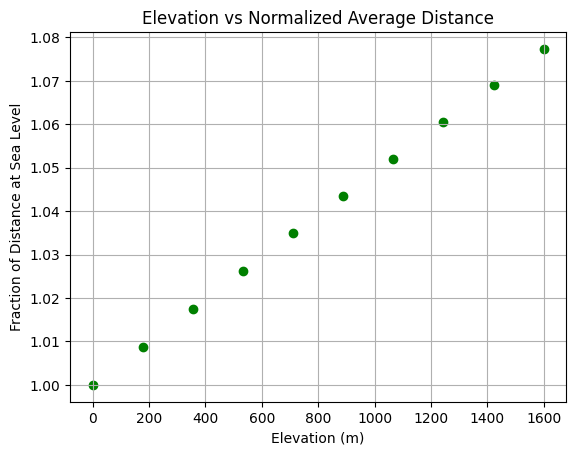

In [73]:
#Plot of Normalized Average Distance vs Rho
plt.scatter(height, normalizedaverage, color='green', alpha=1)
plt.xlabel('Elevation (m)')
plt.ylabel('Fraction of Distance at Sea Level')
plt.title('Elevation vs Normalized Average Distance')
plt.grid(True)
plt.show

[4.83504201e-05 1.00029349e+00]


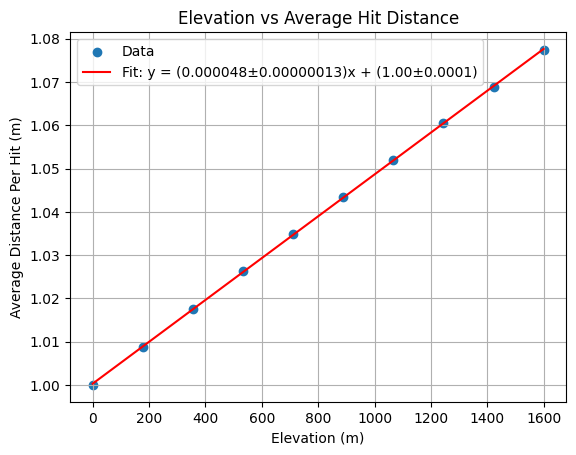

In [31]:
# Fit a line: y = m*x + b
linear_fit, linear_cov=np.polyfit(height,normalizedaverage,1,cov=True) #Determine the fit values m,b, 1=polynomial order
print(linear_fit)
# Generate line for plotting
x_fit = np.linspace(min(height), max(height), 10)
y_fit = linear_fit[0] * x_fit + linear_fit[1]



linear_sigmam=np.sqrt(linear_cov[0,0])   #Error in slope
linear_sigmab=np.sqrt(linear_cov[1,1])   #Error in y intercept



# Plot
plt.scatter(height, normalizedaverage, label='Data')
plt.plot(x_fit, y_fit, color='red', label=f'Fit: y = ({linear_fit[0]:.6f}±{linear_sigmam:.8f})x + ({linear_fit[1]:.2f}±{linear_sigmab:.4f})')
plt.xlabel('Elevation (m)')
plt.ylabel('Average Distance Per Hit (m)')
plt.title('Elevation vs Average Hit Distance')
plt.legend()
plt.grid(True)
plt.savefig('Elevation_vs_Average_Hit_Distance_Normalized.png')
plt.show()

In [30]:
Chi_Squaredaveragelinearnormalized=chisquared(y_fit,normalizedaverage)
Chi_Squaredaveragelinearnormalized

3.3816882032895284e-07